In [13]:
# importing functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import math as m

In [14]:
# reading the files
tr=pd.read_csv("train.csv")
tr=tr.fillna(0)
te=pd.read_csv("test.csv")
te=te.fillna(0)
key=pd.read_csv("gender_submission.csv")
arr=np.array(tr[['Sex','Age','SibSp','Parch','Fare','Survived']])
for i in range(len(arr)):
    if arr[i][0]=='male':
        arr[i][0]=1
    elif arr[i][0]=='female':
        arr[i][0]=0
arr1=np.array(te[['Sex','Age','SibSp','Parch','Fare']])
for i in range(len(arr1)):
    if arr1[i][0]=='male':
        arr1[i][0]=1
    elif arr1[i][0]=='female':
        arr1[i][0]=0

In [15]:
# guess function
def guess(a,b):
 c=np.dot(a,b)
 return 1/(1+m.exp(-c))

In [16]:
# cost fuction
def cost(a,b):
    cos=0.0
    for i in range(len(a)):
        cos += -(a[i][5]*m.log(guess(a[i][:5],b)))-((1-a[i][5])*m.log(1-guess(a[i][:5],b)))
    return cos/len(a)

In [17]:
# gradient function
def grad(k,a,b):
    grad=0.0
    for i in range(len(a)):
        grad += a[i][k]*(guess(a[i][:5],b)-a[i][5])
    return grad/len(a)

[-2.07319153  0.00932747 -0.23080724 -0.06378808  0.01753492]


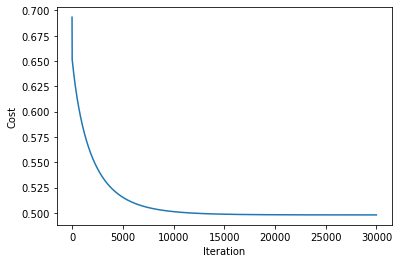

In [18]:
# training
w=np.array([0.0,0.0,0.0,0.0,0.0])
x=[]
y=[]
lr=0.003
for j in range(30000):
 x.append(j)
 y.append(cost(arr,w))
 for i in range(5):
  w[i]-= lr*grad(i,arr,w)
print(w)
mp.xlabel("Iteration")
mp.ylabel("Cost")
mp.plot(x,y)

In [19]:
# testing
k=0.0
for i in range(len(arr1)):
    if(abs(guess(arr1[i],w)-key.loc[i,'Survived'])<0.5):
        k=k+1
print("The accuracy of this model is",k/len(arr1)*100,"%")

The accuracy of this model is 95.45454545454545 %


In [20]:
# predicting
arpit=np.array([1,20,0,0,7.5])
print("The chance of arpit's survival is",guess(arpit,w))
shreya=np.array([0,19,1,1,512])
print("The chance of shreya's survival is",guess(shreya,w))

The chance of arpit's survival is 0.14740129655893852
The chance of shreya's survival is 0.9998581370713837
